In [ ]:
# Plan: compute spectrograms of A and C, do 1D OT frame by frame

In [26]:
import librosa
import IPython
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import ot

In [19]:
A_signal, sr = librosa.load('A.wav', sr=44100)
C_signal, _ = librosa.load('C.wav', sr=44100, duration=len(A_signal) / sr)

/var/folders/0f/q6_npq51017f1x2tyhw_jqf00000gp/T/ipykernel_9349/300701878.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(A_stft, ref=np.max), y_axis='log', x_axis='time', ax=axs[0], sr=sr, n_fft=n_fft, hop_length=n_fft//4)
/var/folders/0f/q6_npq51017f1x2tyhw_jqf00000gp/T/ipykernel_9349/300701878.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(C_stft, ref=np.max), y_axis='log', x_axis='time', ax=axs[1], sr=sr, n_fft=n_fft, hop_length=n_fft//4)


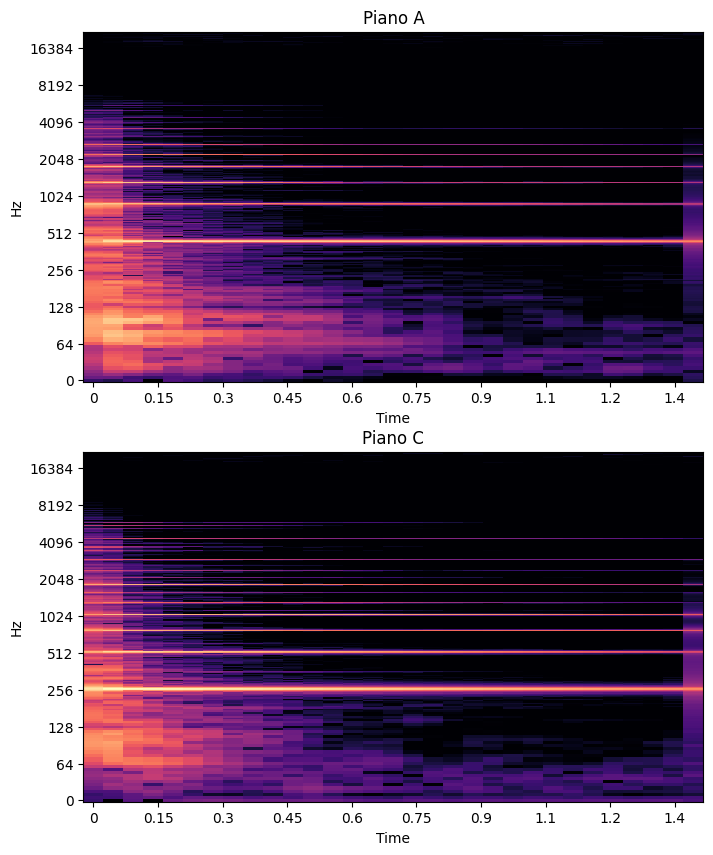

In [25]:
n_fft = 8192
A_stft = librosa.stft(A_signal, n_fft=n_fft)
C_stft = librosa.stft(C_signal, n_fft=n_fft)

fig, axs = plt.subplots(2,1, figsize=(8, 10))
librosa.display.specshow(librosa.amplitude_to_db(A_stft, ref=np.max), y_axis='log', x_axis='time', ax=axs[0], sr=sr, n_fft=n_fft, hop_length=n_fft//4)
librosa.display.specshow(librosa.amplitude_to_db(C_stft, ref=np.max), y_axis='log', x_axis='time', ax=axs[1], sr=sr, n_fft=n_fft, hop_length=n_fft//4)
axs[0].set_title(f"Piano A")
axs[1].set_title(f"Piano C")
plt.show()

In [32]:
f_bins = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
M = ot.utils.dist(f_bins)
M /= M.max()

plt.imshow(M)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

ValueError: einstein sum subscripts string contains too many subscripts for operand 0

In [34]:
f_bins

array([0.00000000e+00, 5.38330078e+00, 1.07666016e+01, ...,
       2.20392334e+04, 2.20446167e+04, 2.20500000e+04])